In [1]:
%matplotlib inline
from chesslab.agent_torch import agent
from chesslab.agent_mcts import agent_MCTS, MCTS_graph
#from chesslab_.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
from chesslab.utils import join_and_sort
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from IPython.display import display
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
import torch.nn as nn
class Model_0(nn.Module):

    def __init__(self):
        super().__init__()
        #self.func_1=nn.ReLU()
        #self.func_2=nn.ReLU()
        #self.func_3=nn.ReLU()
        #self.func_4=nn.ReLU()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        #self.d1 = nn.Dropout(0.5)
        #self.d2 = nn.Dropout(0.5)
        #self.d3 = nn.Dropout(0.5)
        #self.d4 = nn.Dropout(0.5)
        
        #self.b1= nn.BatchNorm2d(32)
        #self.b2= nn.BatchNorm2d(64)
        #self.b3= nn.BatchNorm2d(128)
        #self.b4 = nn.BatchNorm1d(256)
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        #out = self.b1(out)
        out = self.func_1(out)
        #out = self.d1(out)
        out = self.cnn_2(out)
        #out = self.b2(out)
        out = self.func_2(out)
        #out = self.d2(out)
        out = self.cnn_3(out)
        #out = self.b3(out)
        out = self.func_3(out)
        #out = self.d3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        #out = self.b4(out)
        out = self.func_4(out)
        #out = self.d4(out)
        out = self.linear_2(out)

        return out
model = Model_0()

In [3]:
a = 2
a = a+1 if False else a-1
a

1

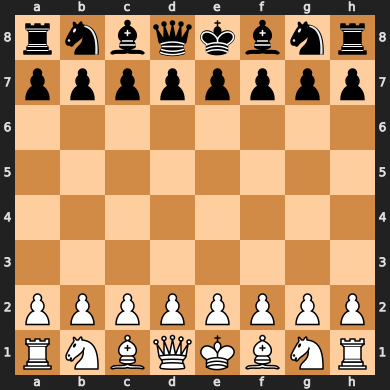

In [4]:
board=chess.Board()
board

In [5]:
base_name = './tmp/torch_weights.0.{}.pt'
deepbot = agent(model,base_name.format(3))
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('d2d4')

In [6]:
moves,values=deepbot.get_move_values(board,both_players=True)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
np.round(values.tolist())

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [9]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=2)

In [10]:
moves,values=deepMCTS.get_move_values(board)

MCTS - rollouts:100 Elapsed time: 1.15s = 0.02m


In [11]:
moves

[Move.from_uci('b1a3'),
 Move.from_uci('a2a3'),
 Move.from_uci('g1h3'),
 Move.from_uci('f2f3'),
 Move.from_uci('c2c4'),
 Move.from_uci('d2d4'),
 Move.from_uci('b2b4'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a4'),
 Move.from_uci('c2c3'),
 Move.from_uci('h2h3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g3'),
 Move.from_uci('g2g4'),
 Move.from_uci('e2e4'),
 Move.from_uci('e2e3'),
 Move.from_uci('b1c3'),
 Move.from_uci('d2d3'),
 Move.from_uci('f2f4'),
 Move.from_uci('g1f3')]

In [12]:
values

array([0.53900802, 0.53948396, 0.52941519, 0.52981395, 0.50954648,
       0.58591682, 0.51482083, 0.50567049, 0.54552164, 0.49047914,
       0.54602351, 0.54729246, 0.5294083 , 0.51053155, 0.52985888,
       0.53962888, 0.54334825, 0.53675075, 0.49960702, 0.54087144])

In [13]:
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.5859168171882629],
       [Move.from_uci('h2h4'), 0.5472924609978994],
       [Move.from_uci('h2h3'), 0.5460235118865967],
       [Move.from_uci('a2a4'), 0.5455216407775879],
       [Move.from_uci('b1c3'), 0.5433482527732849],
       [Move.from_uci('g1f3'), 0.5408714413642883],
       [Move.from_uci('e2e3'), 0.5396288832028707],
       [Move.from_uci('a2a3'), 0.5394839644432068],
       [Move.from_uci('b1a3'), 0.5390080213546753],
       [Move.from_uci('d2d3'), 0.5367507537206014],
       [Move.from_uci('e2e4'), 0.5298588752746582],
       [Move.from_uci('f2f3'), 0.5298139452934265],
       [Move.from_uci('g1h3'), 0.5294151902198792],
       [Move.from_uci('g2g3'), 0.5294082999229431],
       [Move.from_uci('b2b4'), 0.5148208320140839],
       [Move.from_uci('g2g4'), 0.5105315506458282],
       [Move.from_uci('c2c4'), 0.5095464766025544],
       [Move.from_uci('b2b3'), 0.5056704938411712],
       [Move.from_uci('f2f4'), 0.49960702160994214],
       [Mov

MCTS - rollouts:200 Elapsed time: 1.14s = 0.02m


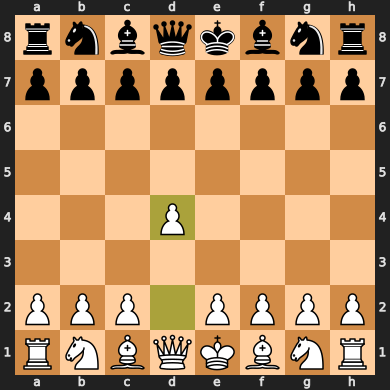

In [14]:
move=deepMCTS.select_move(board)
board.push(move)
board

In [15]:
acc,acc_w,boards,data = kaufman_test(deepbot,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 3/25 = 0.12 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 15 & 48 & 0.7021 & 0.6491 & c1c7 & 0.8680  \\
02 & f5d4 & 10 & 39 & 0.7632 & 0.6000 & a5a3 & 0.7682  \\
03 & e1d1 & 25 & 38 & 0.3514 & 0.4331 & f2f7 & 0.9078  \\
04 & b1b2 & 5 & 47 & 0.9130 & 0.6110 & e2c3 & 0.6643  \\
05 & g5c1 & 5 & 48 & 0.9149 & 0.6117 & c8c3 & 0.9032  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4709 & a3a2 & 0.4709  \\
07 & b7e4 & 6 & 33 & 0.8438 & 0.6299 & f6h7 & 0.6831  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.2408 & e1c1 & 0.5129  \\
09 & f3e2 & 23 & 35 & 0.3529 & 0.3827 & d2g5 & 0.6882  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.8779 & d5c3 & 0.8779  \\
11 & g3f5 & 4 & 35 & 0.9118 & 0.9851 & g3e4 & 0.9897  \\
12 & c6d6 & 32 & 41 & 0.2250 & 0.0315 & c6c2 & 0.1179  \\
13 & c3d5 & 2 & 30 & 0.9655 & 0.9494 & f1f6 & 0.9936  \\
14 & b1b2 & 5 & 49 & 0.9167 & 0.8446 & d3g6 & 0.8891  \\
15 & d3f5 & 4 & 51 & 0.9400 & 0.9220 & e1e6 & 0.9767  \\
16 & b3b4 & 1 & 10 & 1.0000 & 0.6814 & b3

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.649051,c1c7,0.868016,15,48,0.702128
1,f5d4,0.600032,a5a3,0.768198,10,39,0.763158
2,e1d1,0.433136,f2f7,0.907793,25,38,0.351351
3,b1b2,0.611042,e2c3,0.664325,5,47,0.913043
4,g5c1,0.611670,c8c3,0.903210,5,48,0.914894
5,a3a2,0.470912,a3a2,0.470912,1,31,1.000000
6,b7e4,0.629897,f6h7,0.683105,6,33,0.843750
7,h7h6,0.240783,e1c1,0.512867,11,39,0.736842
8,f3e2,0.382698,d2g5,0.688245,23,35,0.352941
9,d5c3,0.877923,d5c3,0.877923,1,41,1.000000


In [16]:
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])


El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 1.92s = 0.03m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 1.86s = 0.03m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 1.79s = 0.03m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 2.31s = 0.04m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz
MCTS - rollouts:100 Elapsed time: 1.97s = 0.03m

El estado de juego no corresponde con el de la raiz del arbol, se recreó la raiz


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\daniel\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Daniel\AppData\Local\Temp/ipykernel_20900/2493783140.py", line 1, in <module>
    acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
  File "c:\users\daniel\appdata\local\programs\python\python39\lib\site-packages\chesslab\tests.py", line 57, in kaufman_test
    moves,values=agent.get_move_values(board)
  File "c:\users\daniel\appdata\local\programs\python\python39\lib\site-packages\chesslab\agent_mcts.py", line 189, in get_move_values
    node = node.add_random_child(self.bot)
  File "c:\users\daniel\appdata\local\programs\python\python39\lib\site-packages\chesslab\agent_mcts.py", line 75, in add_random_child
    new_node = MCTSNode(game_state=new_game_state, parent=self, move=new_move,value=new_value,bot=bot) #crea un nuevo nodo
  File "

TypeError: object of type 'NoneType' has no len()

In [ ]:
deepMCTS.set_max_iter(1000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [ ]:
deepMCTS.set_max_iter(10000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [ ]:
G = MCTS_graph(deepMCTS)
G.save_graph("mcts.dot",depth=2)

In [ ]:
g = nx.Graph(nx.drawing.nx_pydot.read_dot("mcts.dot"))
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('example.png')
pil_im = Image.open('example.png', 'r')
display(pil_im)

In [ ]:
stop

In [ ]:
import chess.svg
from IPython.display import display
#deepbot = chess_torch_agent('./tmp/model_v1.0.2.h5')
acc,boards,best_moves,move_details,data = kaufman_test(deepbot,details=2)
print('Accuracy: {}'.format(acc))
for i in range(1):
    print('='*50)
    display(chess.svg.board(boards[i],size=350))
    print('best move / move predicted: {} / {}'.format(best_moves[i],move_details[i][0][0]))
    for j,(m,v) in enumerate(move_details[i]):
        print('{:02d} - move: {}: {:.4f}'.format(j+1,m,v))

In [ ]:
import chess.svg
from IPython.display import display
deepbot = agent('{}{}.pt'.format(base_name,1),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,2),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,3),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,30),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [ ]:
exact_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=0)
    exact_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


In [ ]:
valuable_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=3)
    valuable_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

In [ ]:
path = 'E:/database/stockfish_14.exe'
deepbot = s_agent(path)
ss = kaufman_test(deepbot)
print("Exactitud para función de stockfish usando prueba de kaufman {}".format(ss))
ssp  = kaufman_test(deepbot,details=3)
print("Exactitud para función de stockfish usando prueba de kaufman ponderada {}".format(ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

In [ ]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,valuable_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [ ]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*valuable_acc[i]))